# Library

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Gathering Data

In [4]:
layer1 = pd.read_excel('hole4-layer1.xlsx')

In [5]:
layer2 = pd.read_excel('hole4-layer2.xlsx')

In [6]:
layer3 = pd.read_excel('hole4-layer3.xlsx')

# Cleaning Data

**Missing Value**

In [7]:
def check_nan_null(dataframe):
  if dataframe.isnull().values.any() == True:
      print("DataFrame contains NaN or null values.")
  else:
      print("DataFrame does not contain any NaN or null values.")

In [8]:
check_nan_null(layer1)
check_nan_null(layer2)
check_nan_null(layer3)

DataFrame does not contain any NaN or null values.
DataFrame does not contain any NaN or null values.
DataFrame does not contain any NaN or null values.


**Add new columns**

In [9]:
layer1['layer'] = "Layer1"
layer2['layer'] = "Layer2"
layer3['layer'] = "Layer3"

layer1

,X,Y,Z,layer
0,-0.002619,-0.027069,-0.138465,Layer1
1,-0.003619,-0.023469,-0.106547,Layer1
2,0.004163,0.031033,-0.152401,Layer1
3,0.001735,-0.003467,-0.067418,Layer1
4,-0.012121,0.003440,-0.125747,Layer1
...,...,...,...,...
49995,0.043827,0.004404,-0.126965,Layer1
49996,-0.068276,-0.092323,-0.142327,Layer1
49997,0.054451,0.045983,-0.104086,Layer1
49998,-0.030014,-0.011375,-0.066589,Layer1


**Merge all dataframes**

In [10]:
df = pd.concat([layer1, layer2, layer3], ignore_index=True)
df

,X,Y,Z,layer
0,-0.002619,-0.027069,-0.138465,Layer1
1,-0.003619,-0.023469,-0.106547,Layer1
2,0.004163,0.031033,-0.152401,Layer1
3,0.001735,-0.003467,-0.067418,Layer1
4,-0.012121,0.003440,-0.125747,Layer1
...,...,...,...,...
149995,-0.056249,-0.071760,-0.007505,Layer3
149996,-0.076167,-0.084977,0.001595,Layer3
149997,-0.064031,-0.100146,0.000097,Layer3
149998,-0.054371,-0.075177,-0.026229,Layer3


# Feature Engineering

## Time-domain Feature Extraction

In [11]:
dimension = df.iloc[:, 0:3].values

In [12]:
from scipy.stats import kurtosis

extracted_features = np.zeros((len(df), 1))

for x in range(len(extracted_features)):
  extracted_features[x] = kurtosis(dimension[x])

In [13]:
extracted_features = pd.DataFrame(extracted_features)
extracted_features = extracted_features.rename(columns = {0:'kurt'})
extracted_features

,kurt
0,-1.5
1,-1.5
2,-1.5
3,-1.5
4,-1.5
...,...
149995,-1.5
149996,-1.5
149997,-1.5
149998,-1.5


In [14]:
# array 'dimension' dikembalikan ke bentuk dataframe
dimension = pd.DataFrame(dimension)
dimension = dimension.rename(columns = {0:'x', 1:'y', 2:'z'})

In [15]:
extracted_features['mean'] = dimension.mean(axis=1)
extracted_features['rms'] = np.sqrt(np.mean(dimension ** 2, axis=1))
extracted_features['std'] = dimension.std(axis=1)
extracted_features['var'] = dimension.var(axis=1)
extracted_features['skew'] = dimension.skew(axis=1)
extracted_features['crest_factor'] = dimension.max(axis=1) / extracted_features['rms']
extracted_features['shape_factor'] = extracted_features['rms'] / extracted_features['mean']

In [16]:
extracted_features

,kurt,mean,rms,std,var,skew,crest_factor,shape_factor
0,-1.5,-0.056051,0.081470,0.072412,0.005244,-1.512555,-0.032147,-1.453500
1,-1.5,-0.044545,0.063024,0.054605,0.002982,-1.478127,-0.057422,-1.414844
2,-1.5,-0.039068,0.089827,0.099064,0.009814,-1.589799,0.345477,-2.299217
3,-1.5,-0.023050,0.038988,0.038512,0.001483,-1.696566,0.044501,-1.691458
4,-1.5,-0.044809,0.072964,0.070525,0.004974,-1.637668,0.047147,-1.628313
...,...,...,...,...,...,...,...,...
149995,-1.5,-0.045171,0.052820,0.033529,0.001124,1.324458,-0.142087,-1.169320
149996,-1.5,-0.053183,0.065891,0.047643,0.002270,1.665660,0.024206,-1.238957
149997,-1.5,-0.054693,0.068627,0.050770,0.002578,0.799653,0.001413,-1.254769
149998,-1.5,-0.051926,0.055665,0.024565,0.000603,0.443508,-0.471194,-1.072012


# Frequency-domain Feature Extraction

In [17]:
def frequency_centre(signal):
    return ((signal.diff()*signal).sum()) / (2 * np.pi * np.sum(signal**2))

def mean_square_frequency(signal):
    return  np.sum(signal.diff()**2) / (4 * np.pi**2 * np.sum(signal**2))

def root_mean_square_frequency(signal):
    return  np.sqrt(mean_square_frequency(signal))

def root_variance_frequency(signal):
    return  np.sqrt(mean_square_frequency(signal) - frequency_centre(signal)**2)

# calculate FC, RMSF, and RVF
extracted_features['fc'] = dimension.apply(lambda row: frequency_centre(row[['x', 'y', 'z']]), axis=1)
extracted_features['rmsf'] = dimension.apply(lambda row: root_mean_square_frequency(row[['x', 'y', 'z']]), axis=1)
extracted_features['rvf'] = dimension.apply(lambda row: root_variance_frequency(row[['x', 'y', 'z']]), axis=1)

extracted_features

,kurt,mean,rms,std,var,skew,crest_factor,shape_factor,fc,rmsf,rvf
0,-1.5,-0.056051,0.081470,0.072412,0.005244,-1.512555,-0.032147,-1.453500,0.128575,0.128632,0.003801
1,-1.5,-0.044545,0.063024,0.054605,0.002982,-1.478127,-0.057422,-1.414844,0.124448,0.124536,0.004681
2,-1.5,-0.039068,0.089827,0.099064,0.009814,-1.589799,0.345477,-2.299217,0.189287,0.189646,0.011665
3,-1.5,-0.023050,0.038988,0.038512,0.001483,-1.696566,0.044501,-1.691458,0.151102,0.151219,0.005947
4,-1.5,-0.044809,0.072964,0.070525,0.004974,-1.637668,0.047147,-1.628313,0.162417,0.163870,0.021775
...,...,...,...,...,...,...,...,...,...,...,...
149995,-1.5,-0.045171,0.052820,0.033529,0.001124,1.324458,-0.142087,-1.169320,0.011996,0.114992,0.114365
149996,-1.5,-0.053183,0.065891,0.047643,0.002270,1.665660,0.024206,-1.238957,0.010835,0.121352,0.120867
149997,-1.5,-0.054693,0.068627,0.050770,0.002578,0.799653,0.001413,-1.254769,0.040850,0.142664,0.136691
149998,-1.5,-0.051926,0.055665,0.024565,0.000603,0.443508,-0.471194,-1.072012,0.004799,0.087797,0.087666


# Train-Test-Split

In [18]:
from sklearn.model_selection import train_test_split

X = extracted_features
y = df.iloc[:, [3]].values

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 137)

In [20]:
y

array([['Layer1'],
       ['Layer1'],
       ['Layer1'],
       ...,
       ['Layer3'],
       ['Layer3'],
       ['Layer3']], dtype=object)

# Hyperparameter Tuning

## Validation Curves

### n_estimators

In [24]:
from sklearn.model_selection import validation_curve
from sklearn.ensemble import RandomForestClassifier

param_range = [100, 300, 500, 750, 800, 1200]
# np.arange(30, 70, 10)

train_scores, test_scores = validation_curve(
                          RandomForestClassifier(),
                          X = X_train, y = y_train,
                          param_name = 'n_estimators',
                          param_range = param_range, cv = 3,
                          scoring="accuracy", n_jobs=-1)

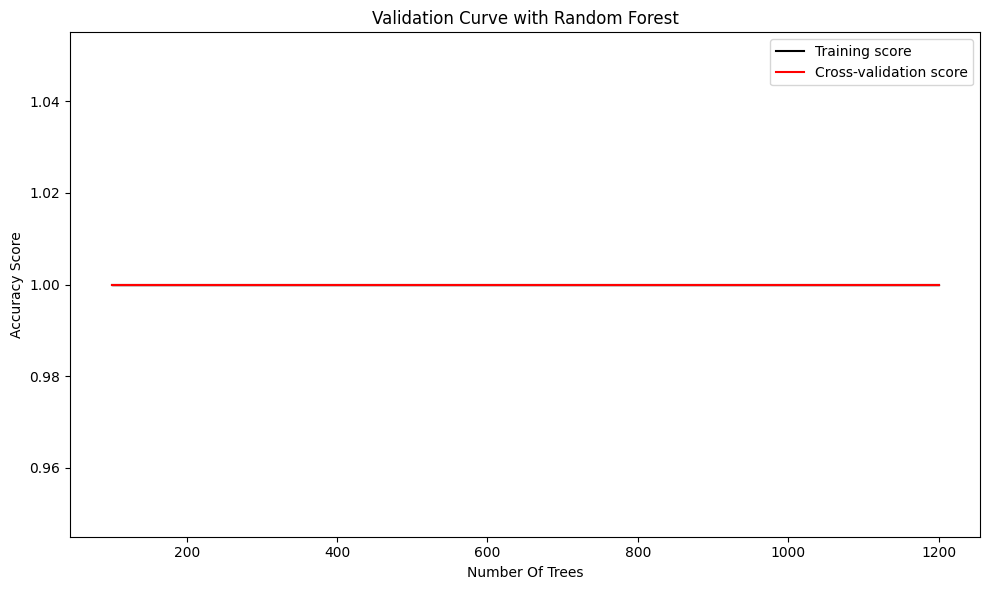

In [25]:
# Calculate mean and standard deviation for training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.subplots(1, figsize=(10, 6))
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="red")

# Plot accuracy bands for training and test sets
plt.fill_between(param_range,
                 train_mean - train_std,
                 train_mean + train_std, color="gray")
plt.fill_between(param_range,
                 test_mean - test_std,
                 test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve with Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc='best')
plt.show()

### max_depth

In [26]:
param_range = [5, 10, 15, 20, 25, 30]

train_scores, test_scores = validation_curve(
                          RandomForestClassifier(),
                          X = X_train, y = y_train,
                          param_name = 'max_depth',
                          param_range = param_range, cv = 3,
                          scoring="accuracy", n_jobs=-1)

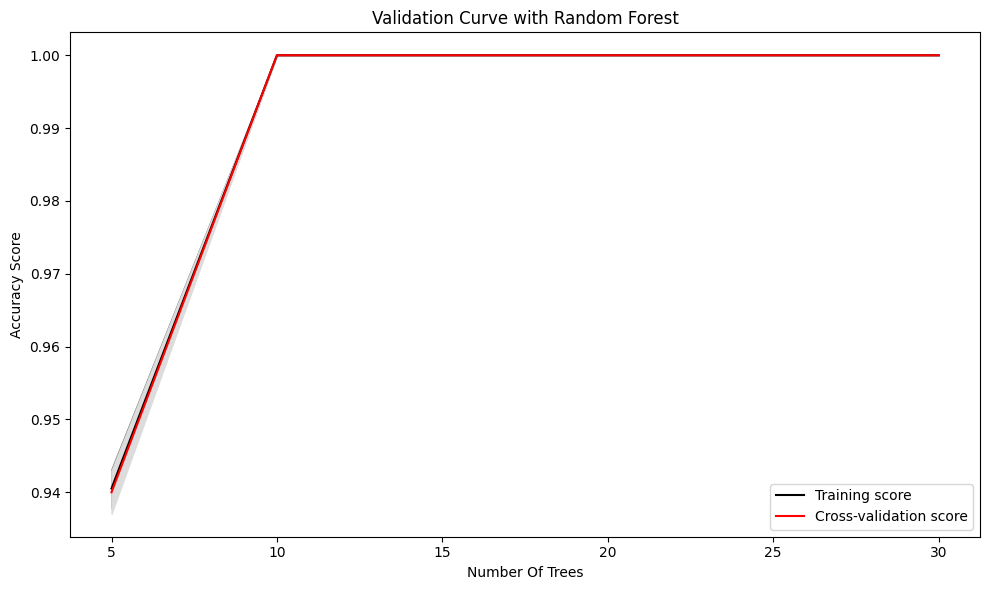

In [27]:
# Calculate mean and standard deviation for training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.subplots(1, figsize=(10, 6))
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="red")

# Plot accuracy bands for training and test sets
plt.fill_between(param_range,
                 train_mean - train_std,
                 train_mean + train_std, color="gray")
plt.fill_between(param_range,
                 test_mean - test_std,
                 test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve with Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc='best')
plt.show()

### min_samples_split

In [28]:
param_range = [2, 4, 6, 8, 10]

train_scores, test_scores = validation_curve(
                          RandomForestClassifier(),
                          X = X_train, y = y_train,
                          param_name = 'min_samples_split',
                          param_range = param_range, cv = 3,
                          scoring="accuracy", n_jobs=-1)

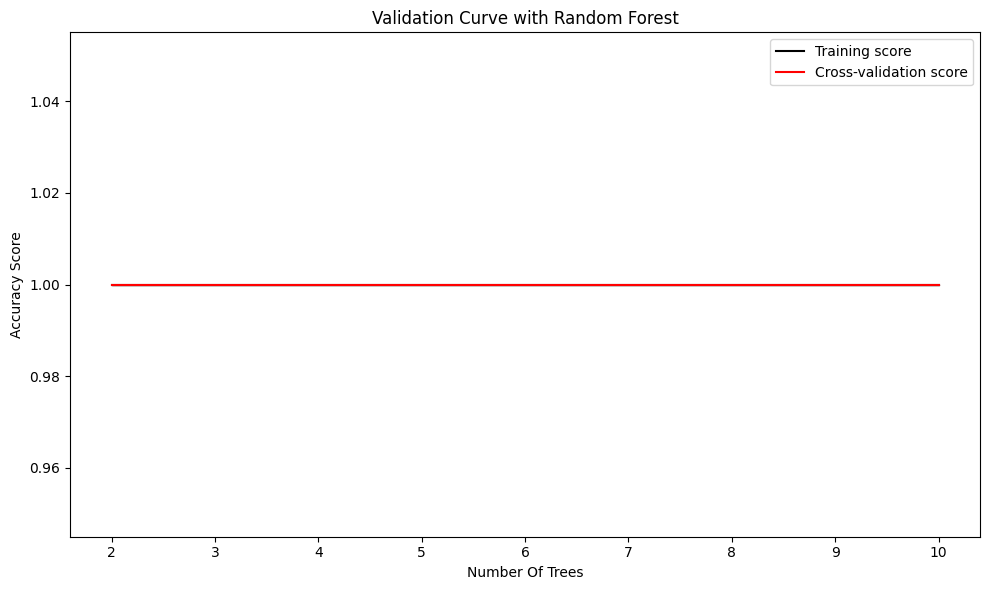

In [29]:
# Calculate mean and standard deviation for training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.subplots(1, figsize=(10, 6))
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="red")

# Plot accuracy bands for training and test sets
plt.fill_between(param_range,
                 train_mean - train_std,
                 train_mean + train_std, color="gray")
plt.fill_between(param_range,
                 test_mean - test_std,
                 test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve with Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc='best')
plt.show()

### min_samples_leaf

In [30]:
param_range = [2, 4, 6, 8, 10]

train_scores, test_scores = validation_curve(
                          RandomForestClassifier(),
                          X = X_train, y = y_train,
                          param_name = 'min_samples_leaf',
                          param_range = param_range, cv = 3,
                          scoring="accuracy", n_jobs=-1)

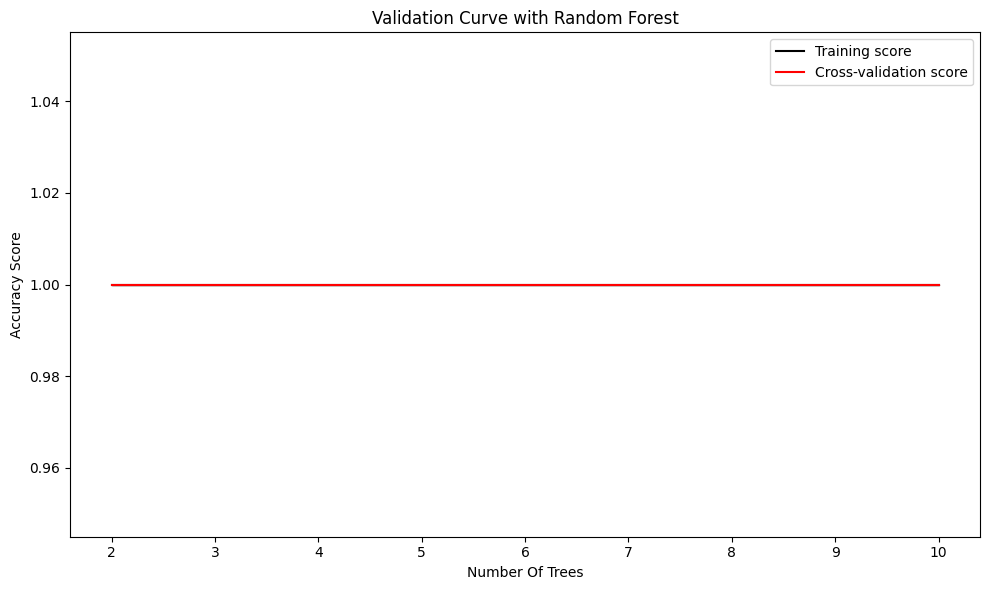

In [31]:
# Calculate mean and standard deviation for training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.subplots(1, figsize=(10, 6))
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="red")

# Plot accuracy bands for training and test sets
plt.fill_between(param_range,
                 train_mean - train_std,
                 train_mean + train_std, color="gray")
plt.fill_between(param_range,
                 test_mean - test_std,
                 test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve with Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc='best')
plt.show()